Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

image size: 512x512



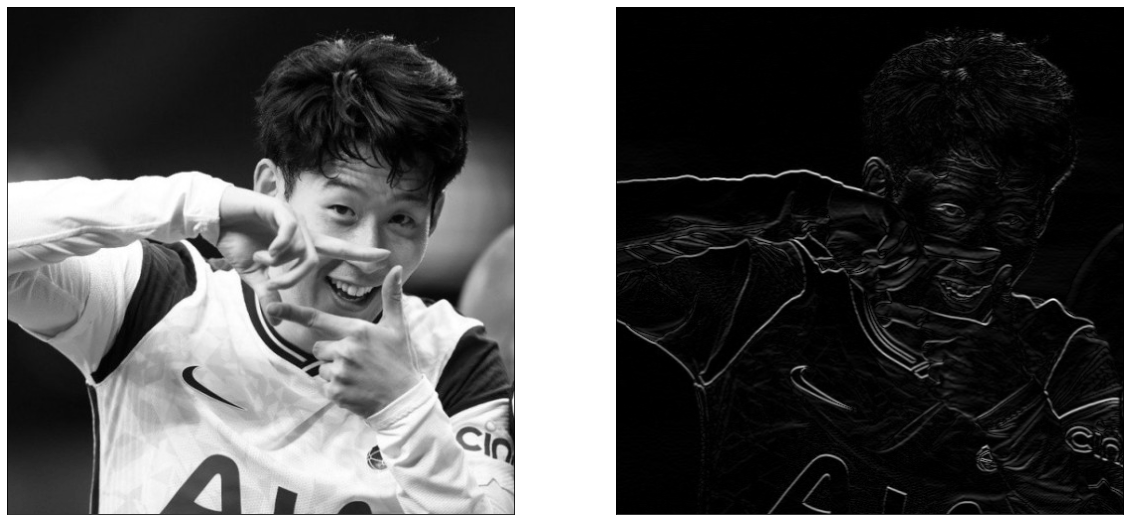

In [1]:
# ------------ 이미지 불러오기 ------------
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt

def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

img = plt.imread('/content/drive/MyDrive/github/딥러닝/라이브러리 사용하지 않고 구현하기/Deep Learning/Mini-project/son.jpg')
img = rgb2gray(img).tolist()
# ----------------------------------------

# ------------ Edge Detection ------------
H = len(img)
W = len(img[0])
print(f'\nimage size: {H}x{W}\n')

sobel_x = [[-1, 0, 1],
           [-2, 0, 2],
           [-1, 0, 1]]
sobel_y = [[1, 2, 1],
           [0, 0, 0],
           [-1, -2, -1]]
conv_filter = sobel_y
filter_size = len(conv_filter)

valid_H = H - filter_size + 1
valid_W = W - filter_size + 1

conv_mat = []
for h in range(valid_H):
    conv_mat_vec = []
    for w in range(valid_W):
        window = []
        for inner_h in range(filter_size):
            window.append(img[h+inner_h][w : w+filter_size])

        conv = 0
        for window_vec, filter_vec in zip(window, conv_filter[::-1]):
            for window_val, filter_val in zip(window_vec, filter_vec[::-1]):
                conv += window_val * filter_val
        
        if conv < 0:
            conv *= -1
        
        conv_mat_vec.append(conv)
    conv_mat.append(conv_mat_vec)
# ----------------------------------------

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
for ax in axes:
    ax.tick_params(left=False,labelleft=False,
                   bottom=False,labelbottom=False)
    axes[0].imshow(img, 'gray')
    axes[1].imshow(conv_mat, 'gray')